In [501]:
import pandas as pd
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
plt.style.use('seaborn')
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [502]:
df = pd.read_csv('forestfires.csv')

In [503]:
def month(x):
    month_name = x
    datetime_object = datetime.datetime.strptime(month_name, "%b")
    month_number = datetime_object.month
    return month_number
df['month'] = df['month'].apply(lambda x : month(x))
df['month']

0       3
1      10
2      10
3       3
4       3
       ..
512     8
513     8
514     8
515     8
516    11
Name: month, Length: 517, dtype: int64

In [504]:
def day(x):
    day = ['mon','tue','wed','thu','fri','sat','sun']
    for i in range(len(day)):
        if x == day[i]:
            return i
df['day'] = df['day'].apply(lambda x : day(x))        

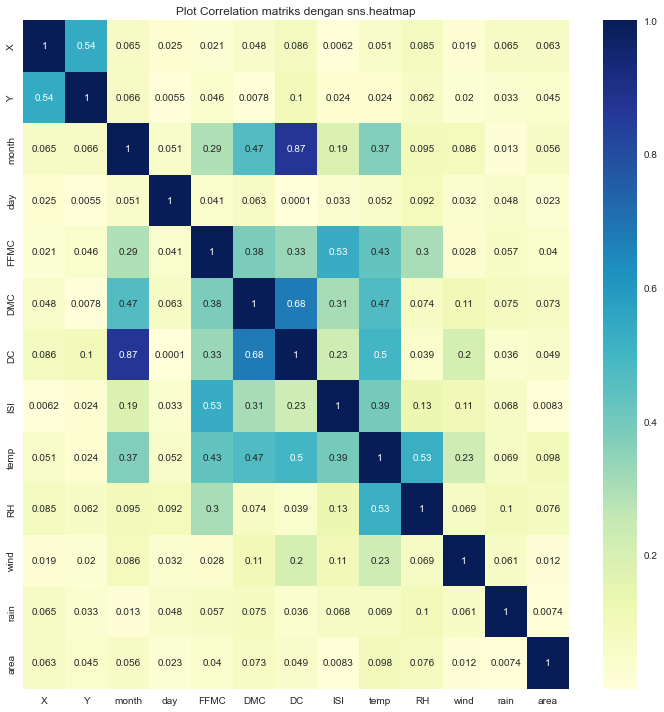

In [505]:
fig = plt.subplots(figsize=(10,10))
sns.heatmap(abs(df.corr()), annot=True, cmap="YlGnBu")
plt.title('Plot Correlation matriks dengan sns.heatmap')
plt.tight_layout()
plt.show()

In [506]:
columns = list(df.columns)
columns.remove('rain')
columns

['X',
 'Y',
 'month',
 'day',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'temp',
 'RH',
 'wind',
 'area']

In [507]:
Q1 = (df[columns]).quantile(0.25)
Q3 = (df[columns]).quantile(0.75)

IQR = Q3 - Q1
maximum  = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)

more_than     = (df > maximum)
lower_than    = (df < minimum)
df       = df.mask(more_than, maximum, axis=1) 
df       = df.mask(lower_than, minimum, axis=1)


Nilai Maximum dari masing-masing Variable adalah: 
X          13.000
Y           6.500
month      12.000
day        11.000
FFMC       96.950
DMC       253.100
DC       1128.200
ISI        17.250
temp       33.750
RH         83.000
wind        8.200
area       16.425
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
X        -3.000
Y         2.500
month     4.000
day      -5.000
FFMC     86.150
DMC     -42.100
DC       23.400
ISI       0.050
temp      4.550
RH        3.000
wind     -0.600
area     -9.855
dtype: float64


C:\Users\Fikry\AppData\Local\Temp/ipykernel_5612/816372055.py:12: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than     = (df > maximum)
C:\Users\Fikry\AppData\Local\Temp/ipykernel_5612/816372055.py:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_than    = (df < minimum)


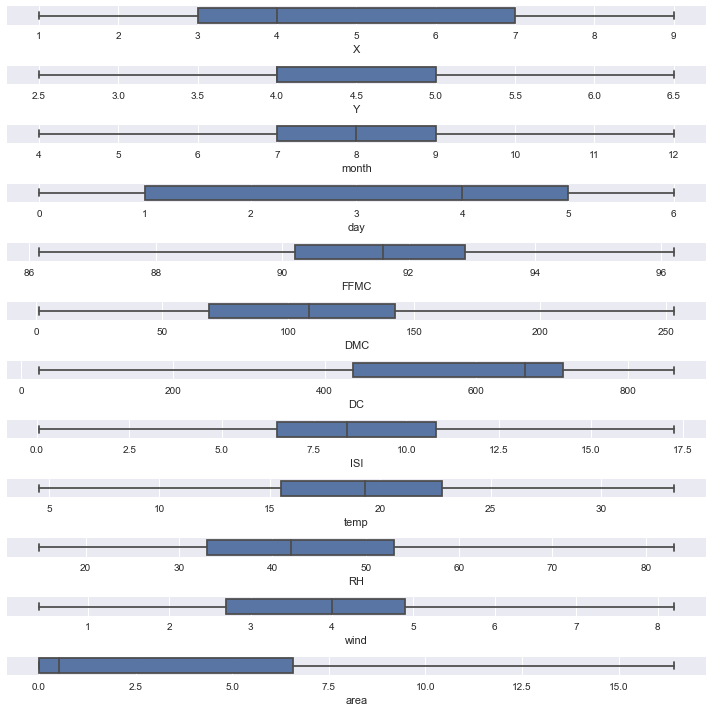

In [508]:
fig, ax = plt.subplots(nrows=len(columns), figsize=(10,10))
for i in range(len(columns)):
    sns.boxplot(x=df[columns[i]], ax=ax[i])
    plt.tight_layout()

In [509]:
def one_above(x):
    if x > 0.0:
        return 1
    if x == 0.0:
        return 0
df['area'] = df['area'].apply(lambda x: one_above(x))
df['area'].value_counts()

1    270
0    247
Name: area, dtype: int64

In [510]:
min_max_scaler = MinMaxScaler()
columns = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain']
for i in range(len(columns)):
    df[columns[i]] = min_max_scaler.fit_transform(df[[columns[i]]])

In [511]:
fitur = len(df.columns) - 1
features = df.values[:,:fitur]
# df.iloc[:,fitur:]
labels = df.values[:,fitur:]

In [512]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=20)
print(f'Ukuran dari X_train : {X_train.shape}')
print(f'Ukuran dari y_train : {y_train.shape}')
print(f'Ukuran dari X_test : {X_test.shape}')
print(f'Ukuran dari y_test : {y_test.shape}')

Ukuran dari X_train : (361, 12)
Ukuran dari y_train : (361, 1)
Ukuran dari X_test : (156, 12)
Ukuran dari y_test : (156, 1)


In [566]:
X_train.shape

(361, 12)

In [514]:
model = Sequential()
model.add(Dense(12, input_dim=fitur, activation='relu'))
# model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [515]:
model.summary()

Model: "sequential_172"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_344 (Dense)           (None, 12)                156       
                                                                 
 dense_345 (Dense)           (None, 1)                 13        
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


In [516]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [517]:
# history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs = 300, batch_size=X_train.shape[0])

In [518]:
# plt.plot(history.history['accuracy'], label='Train')
# plt.plot(history.history['val_accuracy'], label='Valid')
# plt.legend()
# plt.xlabel('Epochs', fontsize=16)
# plt.ylabel('Accuracy', fontsize=16)
# plt.title('Accuracy Curves', fontsize=16)

# plt.show()

In [519]:
# fit a model and plot learning curve
def fit_model(layer):
    model = Sequential()
    model.add(Dense(layer, input_dim=fitur, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit model
    history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs = 300, batch_size=X_train.shape[0], verbose = 0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('layer='+str(layer))
    plt.legend()

In [520]:
layers = list(np.arange(10,100,20))

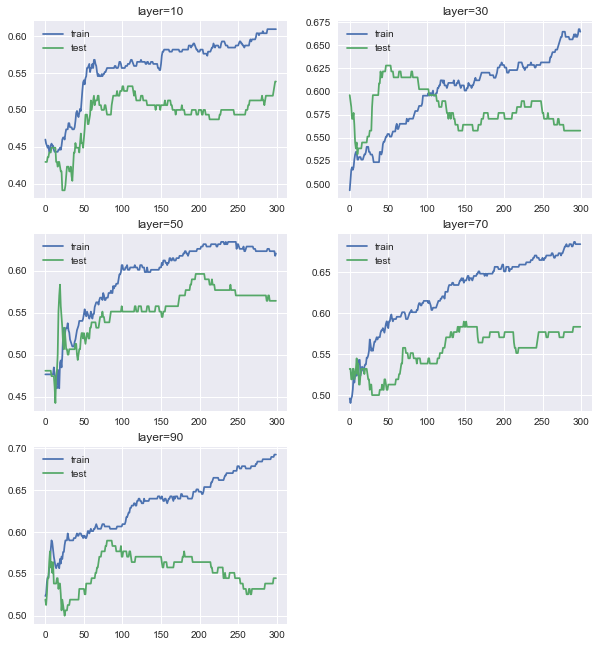

In [521]:
plt.figure(figsize=(10, 15))
for i in range(len(layers)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_model(layers[i])

# show learning curves
plt.show()


Epoch 1: val_accuracy improved from -inf to 0.51923, saving model to best_model.h5

Epoch 2: val_accuracy did not improve from 0.51923

Epoch 3: val_accuracy did not improve from 0.51923

Epoch 4: val_accuracy did not improve from 0.51923

Epoch 5: val_accuracy did not improve from 0.51923

Epoch 6: val_accuracy did not improve from 0.51923

Epoch 7: val_accuracy did not improve from 0.51923

Epoch 8: val_accuracy did not improve from 0.51923

Epoch 9: val_accuracy did not improve from 0.51923

Epoch 10: val_accuracy did not improve from 0.51923

Epoch 11: val_accuracy did not improve from 0.51923

Epoch 12: val_accuracy did not improve from 0.51923

Epoch 13: val_accuracy did not improve from 0.51923

Epoch 14: val_accuracy did not improve from 0.51923

Epoch 15: val_accuracy improved from 0.51923 to 0.52564, saving model to best_model.h5

Epoch 16: val_accuracy did not improve from 0.52564

Epoch 17: val_accuracy improved from 0.52564 to 0.53205, saving model to best_model.h5

Epoch


Epoch 151: val_accuracy did not improve from 0.56410

Epoch 152: val_accuracy did not improve from 0.56410

Epoch 153: val_accuracy did not improve from 0.56410

Epoch 154: val_accuracy did not improve from 0.56410

Epoch 155: val_accuracy did not improve from 0.56410

Epoch 156: val_accuracy did not improve from 0.56410

Epoch 157: val_accuracy did not improve from 0.56410

Epoch 158: val_accuracy did not improve from 0.56410

Epoch 159: val_accuracy did not improve from 0.56410

Epoch 160: val_accuracy did not improve from 0.56410

Epoch 161: val_accuracy did not improve from 0.56410

Epoch 162: val_accuracy did not improve from 0.56410

Epoch 163: val_accuracy did not improve from 0.56410

Epoch 164: val_accuracy did not improve from 0.56410

Epoch 165: val_accuracy did not improve from 0.56410

Epoch 166: val_accuracy did not improve from 0.56410

Epoch 167: val_accuracy did not improve from 0.56410

Epoch 168: val_accuracy did not improve from 0.56410

Epoch 169: val_accuracy did


Epoch 3: val_accuracy did not improve from 0.51923

Epoch 4: val_accuracy did not improve from 0.51923

Epoch 5: val_accuracy did not improve from 0.51923

Epoch 6: val_accuracy did not improve from 0.51923

Epoch 7: val_accuracy did not improve from 0.51923

Epoch 8: val_accuracy did not improve from 0.51923

Epoch 9: val_accuracy did not improve from 0.51923

Epoch 10: val_accuracy did not improve from 0.51923

Epoch 11: val_accuracy did not improve from 0.51923

Epoch 12: val_accuracy did not improve from 0.51923

Epoch 13: val_accuracy did not improve from 0.51923

Epoch 14: val_accuracy did not improve from 0.51923

Epoch 15: val_accuracy did not improve from 0.51923

Epoch 16: val_accuracy did not improve from 0.51923

Epoch 17: val_accuracy improved from 0.51923 to 0.52564, saving model to best_model.h5

Epoch 18: val_accuracy did not improve from 0.52564

Epoch 19: val_accuracy did not improve from 0.52564

Epoch 20: val_accuracy did not improve from 0.52564

Epoch 21: val_acc


Epoch 153: val_accuracy did not improve from 0.55769

Epoch 154: val_accuracy did not improve from 0.55769

Epoch 155: val_accuracy did not improve from 0.55769

Epoch 156: val_accuracy did not improve from 0.55769

Epoch 157: val_accuracy did not improve from 0.55769

Epoch 158: val_accuracy did not improve from 0.55769

Epoch 159: val_accuracy did not improve from 0.55769

Epoch 160: val_accuracy did not improve from 0.55769

Epoch 161: val_accuracy did not improve from 0.55769

Epoch 162: val_accuracy did not improve from 0.55769

Epoch 163: val_accuracy did not improve from 0.55769

Epoch 164: val_accuracy did not improve from 0.55769

Epoch 165: val_accuracy did not improve from 0.55769

Epoch 166: val_accuracy did not improve from 0.55769

Epoch 167: val_accuracy did not improve from 0.55769

Epoch 168: val_accuracy did not improve from 0.55769

Epoch 169: val_accuracy did not improve from 0.55769

Epoch 170: val_accuracy did not improve from 0.55769

Epoch 171: val_accuracy did


Epoch 3: val_accuracy did not improve from 0.46795

Epoch 4: val_accuracy did not improve from 0.46795

Epoch 5: val_accuracy did not improve from 0.46795

Epoch 6: val_accuracy did not improve from 0.46795

Epoch 7: val_accuracy did not improve from 0.46795

Epoch 8: val_accuracy did not improve from 0.46795

Epoch 9: val_accuracy improved from 0.46795 to 0.47436, saving model to best_model.h5

Epoch 10: val_accuracy improved from 0.47436 to 0.51923, saving model to best_model.h5

Epoch 11: val_accuracy did not improve from 0.51923

Epoch 12: val_accuracy did not improve from 0.51923

Epoch 13: val_accuracy did not improve from 0.51923

Epoch 14: val_accuracy did not improve from 0.51923

Epoch 15: val_accuracy did not improve from 0.51923

Epoch 16: val_accuracy did not improve from 0.51923

Epoch 17: val_accuracy did not improve from 0.51923

Epoch 18: val_accuracy did not improve from 0.51923

Epoch 19: val_accuracy did not improve from 0.51923

Epoch 20: val_accuracy did not impr


Epoch 152: val_accuracy did not improve from 0.55769

Epoch 153: val_accuracy did not improve from 0.55769

Epoch 154: val_accuracy did not improve from 0.55769

Epoch 155: val_accuracy did not improve from 0.55769

Epoch 156: val_accuracy did not improve from 0.55769

Epoch 157: val_accuracy did not improve from 0.55769

Epoch 158: val_accuracy did not improve from 0.55769

Epoch 159: val_accuracy did not improve from 0.55769

Epoch 160: val_accuracy did not improve from 0.55769

Epoch 161: val_accuracy did not improve from 0.55769

Epoch 162: val_accuracy did not improve from 0.55769

Epoch 163: val_accuracy did not improve from 0.55769

Epoch 164: val_accuracy did not improve from 0.55769

Epoch 165: val_accuracy did not improve from 0.55769

Epoch 166: val_accuracy did not improve from 0.55769

Epoch 167: val_accuracy did not improve from 0.55769

Epoch 168: val_accuracy did not improve from 0.55769

Epoch 169: val_accuracy did not improve from 0.55769

Epoch 170: val_accuracy did


Epoch 2: val_accuracy did not improve from 0.48077

Epoch 3: val_accuracy improved from 0.48077 to 0.48718, saving model to best_model.h5

Epoch 4: val_accuracy did not improve from 0.48718

Epoch 5: val_accuracy did not improve from 0.48718

Epoch 6: val_accuracy improved from 0.48718 to 0.49359, saving model to best_model.h5

Epoch 7: val_accuracy did not improve from 0.49359

Epoch 8: val_accuracy did not improve from 0.49359

Epoch 9: val_accuracy did not improve from 0.49359

Epoch 10: val_accuracy did not improve from 0.49359

Epoch 11: val_accuracy did not improve from 0.49359

Epoch 12: val_accuracy did not improve from 0.49359

Epoch 13: val_accuracy did not improve from 0.49359

Epoch 14: val_accuracy did not improve from 0.49359

Epoch 15: val_accuracy did not improve from 0.49359

Epoch 16: val_accuracy did not improve from 0.49359

Epoch 17: val_accuracy did not improve from 0.49359

Epoch 18: val_accuracy did not improve from 0.49359

Epoch 19: val_accuracy did not impro


Epoch 146: val_accuracy did not improve from 0.57692

Epoch 147: val_accuracy did not improve from 0.57692

Epoch 148: val_accuracy did not improve from 0.57692

Epoch 149: val_accuracy did not improve from 0.57692

Epoch 150: val_accuracy did not improve from 0.57692

Epoch 151: val_accuracy did not improve from 0.57692

Epoch 152: val_accuracy did not improve from 0.57692

Epoch 153: val_accuracy did not improve from 0.57692

Epoch 154: val_accuracy did not improve from 0.57692

Epoch 155: val_accuracy did not improve from 0.57692

Epoch 156: val_accuracy did not improve from 0.57692

Epoch 157: val_accuracy did not improve from 0.57692

Epoch 158: val_accuracy did not improve from 0.57692

Epoch 159: val_accuracy did not improve from 0.57692

Epoch 160: val_accuracy did not improve from 0.57692

Epoch 161: val_accuracy did not improve from 0.57692

Epoch 162: val_accuracy did not improve from 0.57692

Epoch 163: val_accuracy did not improve from 0.57692

Epoch 164: val_accuracy did


Epoch 22: val_accuracy did not improve from 0.52564

Epoch 23: val_accuracy did not improve from 0.52564

Epoch 24: val_accuracy improved from 0.52564 to 0.53205, saving model to best_model.h5

Epoch 25: val_accuracy improved from 0.53205 to 0.53846, saving model to best_model.h5

Epoch 26: val_accuracy improved from 0.53846 to 0.54487, saving model to best_model.h5

Epoch 27: val_accuracy improved from 0.54487 to 0.55128, saving model to best_model.h5

Epoch 28: val_accuracy improved from 0.55128 to 0.55769, saving model to best_model.h5

Epoch 29: val_accuracy did not improve from 0.55769

Epoch 30: val_accuracy improved from 0.55769 to 0.56410, saving model to best_model.h5

Epoch 31: val_accuracy did not improve from 0.56410

Epoch 32: val_accuracy did not improve from 0.56410

Epoch 33: val_accuracy did not improve from 0.56410

Epoch 34: val_accuracy did not improve from 0.56410

Epoch 35: val_accuracy did not improve from 0.56410

Epoch 36: val_accuracy did not improve from 0.5


Epoch 170: val_accuracy did not improve from 0.57692

Epoch 171: val_accuracy did not improve from 0.57692

Epoch 172: val_accuracy did not improve from 0.57692

Epoch 173: val_accuracy did not improve from 0.57692

Epoch 174: val_accuracy did not improve from 0.57692

Epoch 175: val_accuracy did not improve from 0.57692

Epoch 176: val_accuracy did not improve from 0.57692

Epoch 177: val_accuracy did not improve from 0.57692

Epoch 178: val_accuracy did not improve from 0.57692

Epoch 179: val_accuracy did not improve from 0.57692

Epoch 180: val_accuracy did not improve from 0.57692

Epoch 181: val_accuracy did not improve from 0.57692

Epoch 182: val_accuracy did not improve from 0.57692

Epoch 183: val_accuracy did not improve from 0.57692

Epoch 184: val_accuracy did not improve from 0.57692

Epoch 185: val_accuracy did not improve from 0.57692

Epoch 186: val_accuracy did not improve from 0.57692

Epoch 187: val_accuracy did not improve from 0.57692

Epoch 188: val_accuracy did

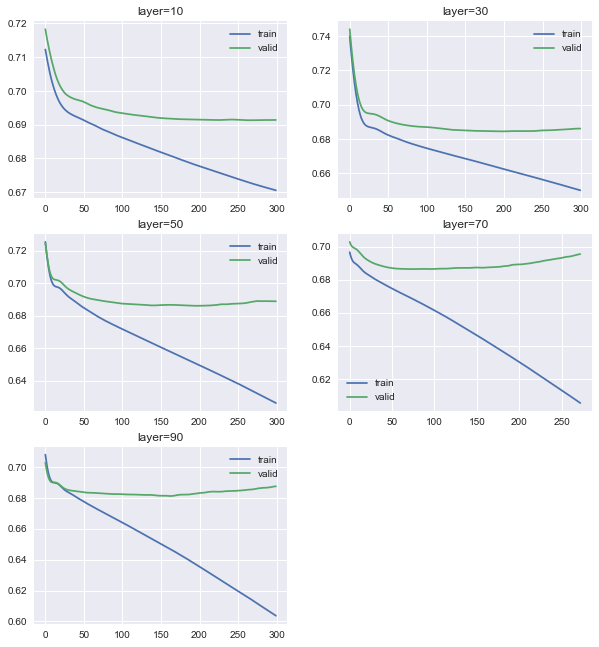

In [530]:
# fit a model and plot learning curve
def fit_model(layer):
    model = Sequential()
    model.add(Dense(layer, input_dim=fitur, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit model
    # simple early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
    mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
    history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs = 300, batch_size=X_train.shape[0], verbose = 0, callbacks=[es, mc])
    
    # plot learning curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='valid')
    plt.title('layer='+str(layer))
    plt.legend()
plt.figure(figsize=(10, 15))
for i in range(len(layers)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_model(layers[i])

# show learning curves
plt.show()

# Memakai Layer 10

In [551]:
layer = 20

In [552]:
# fit a model and plot learning curve

def fit_model(lrt):
    model = Sequential()
    model.add(Dense(layer, input_dim=fitur, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))    # compile model
    optimizer = Adam(lr=lrt)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    # fit model
    history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs = 300, batch_size=X_train.shape[0], verbose = 0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('learning rate='+str(lrt))
    plt.legend()

In [553]:
lrt = [0.1,0.01,0.001,0.0001,0.00001]

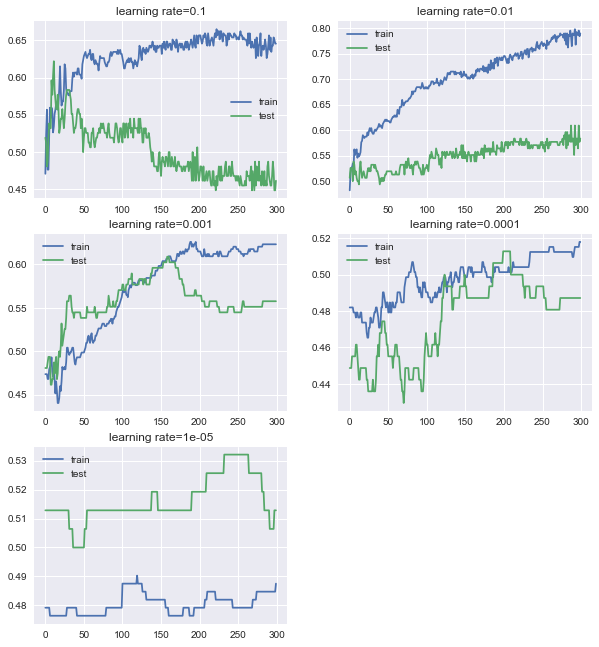

In [554]:
plt.figure(figsize=(10, 15))
for i in range(len(lrt)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_model(lrt[i])

# show learning curves
plt.show()

Epoch 239: early stopping
Epoch 272: early stopping
Epoch 210: early stopping


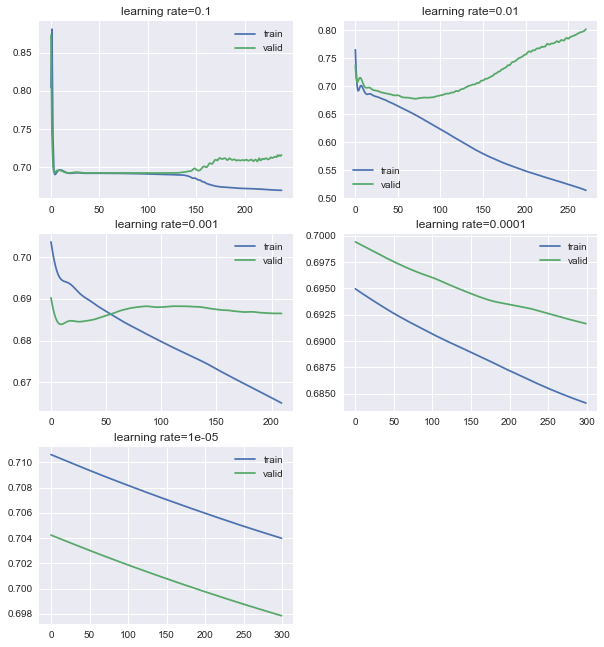

In [555]:
# fit a model and plot learning curve
def fit_model(lrt):
    model = Sequential()
    model.add(Dense(layer, input_dim=fitur, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))    # compile model
    optimizer = Adam(lr=lrt)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    # fit model
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
    mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)
    history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs = 300, batch_size=X_train.shape[0], verbose = 0, callbacks=[es, mc])

    
    # plot learning curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='valid')
    plt.title('learning rate='+str(lrt))
    plt.legend()
plt.figure(figsize=(10, 15))
for i in range(len(lrt)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_model(lrt[i])

# show learning curves
plt.show()

In [556]:
layer = 15

In [557]:
# fit a model and plot learning curve

def fit_model(lrt):
    model = Sequential()
    model.add(Dense(layer, input_dim=fitur, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))    # compile model
    optimizer = Adam(lr=lrt)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    # fit model
    history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs = 300, batch_size=X_train.shape[0], verbose = 0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('learning rate='+str(lrt))
    plt.legend()

In [558]:
lrt = [0.1,0.01,0.001,0.0001,0.00001]

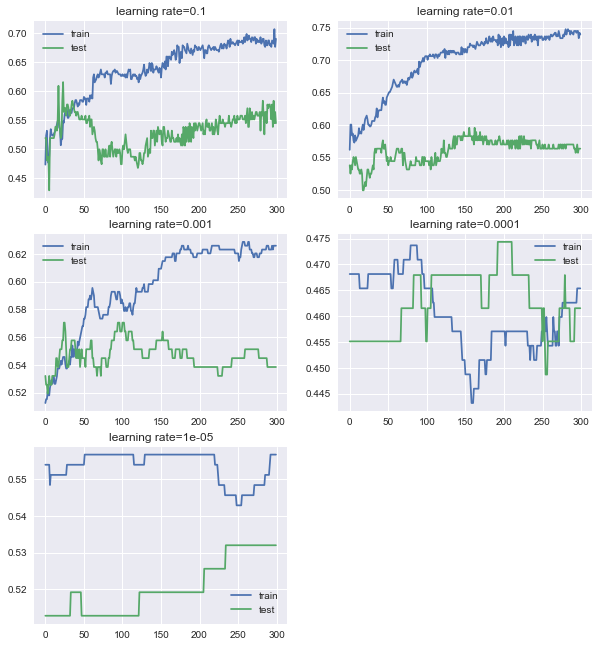

In [559]:
plt.figure(figsize=(10, 15))
for i in range(len(lrt)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_model(lrt[i])

# show learning curves
plt.show()

Epoch 232: early stopping
Epoch 205: early stopping
Epoch 225: early stopping


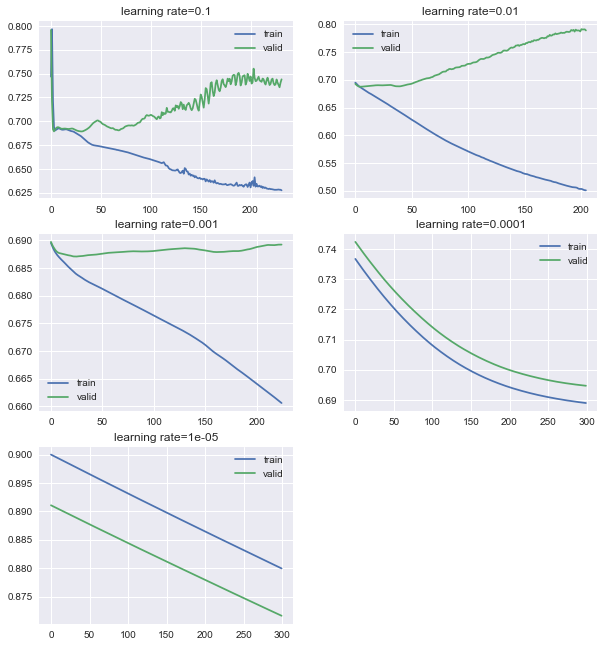

In [560]:
# fit a model and plot learning curve
def fit_model(lrt):
    model = Sequential()
    model.add(Dense(layer, input_dim=fitur, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))    # compile model
    optimizer = Adam(lr=lrt)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    # fit model
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
    mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)
    history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs = 300, batch_size=X_train.shape[0], verbose = 0, callbacks=[es, mc])

    
    # plot learning curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='valid')
    plt.title('learning rate='+str(lrt))
    plt.legend()
plt.figure(figsize=(10, 15))
for i in range(len(lrt)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_model(lrt[i])

# show learning curves
plt.show()

In [561]:
layer = 10

In [562]:
# fit a model and plot learning curve

def fit_model(lrt):
    model = Sequential()
    model.add(Dense(layer, input_dim=fitur, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))    # compile model
    optimizer = Adam(lr=lrt)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    # fit model
    history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs = 300, batch_size=X_train.shape[0], verbose = 0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('learning rate='+str(lrt))
    plt.legend()

In [563]:
lrt = [0.1,0.01,0.001,0.0001,0.00001]

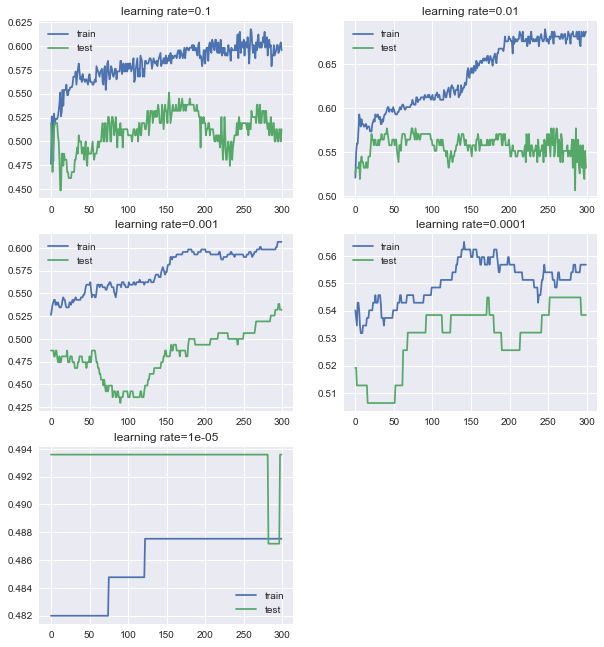

In [564]:
plt.figure(figsize=(10, 15))
for i in range(len(lrt)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_model(lrt[i])

# show learning curves
plt.show()

Epoch 266: early stopping


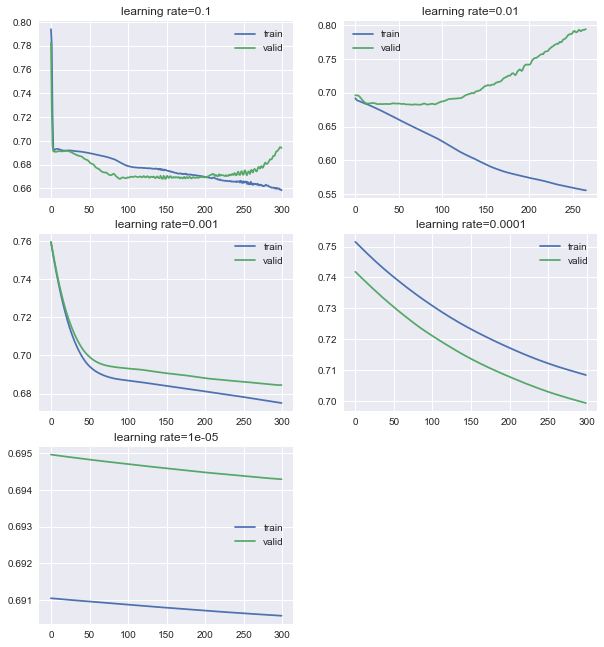

In [565]:
# fit a model and plot learning curve
def fit_model(lrt):
    model = Sequential()
    model.add(Dense(layer, input_dim=fitur, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))    # compile model
    optimizer = Adam(lr=lrt)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    # fit model
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
    mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)
    history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs = 300, batch_size=X_train.shape[0], verbose = 0, callbacks=[es, mc])

    
    # plot learning curves
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='valid')
    plt.title('learning rate='+str(lrt))
    plt.legend()
plt.figure(figsize=(10, 15))
for i in range(len(lrt)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_model(lrt[i])

# show learning curves
plt.show()

# Learning Rate = 0.1

Kita dapati kesimpulan bahwa model yang kita gunakan yaitu :

Layer = 10

Activation = sigmoid

Learning Rate = 0.001

Epochs = 300

Batch_Size = 361

Patience = 200

In [575]:
# fit a model and plot learning curve
layer = 10

activation_output = 'sigmoid'

learning_rate = 0.001

epochs = 300

batch_size = 361

patience = 200

model = Sequential()
model.add(Dense(layer, input_dim=fitur, activation='relu'))
model.add(Dense(1, activation=activation_output))    # compile model
optimizer = Adam(lr=learning_rate)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# fit model
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=patience)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)
history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs = epochs, batch_size=batch_size, verbose = 0, callbacks=[es, mc])


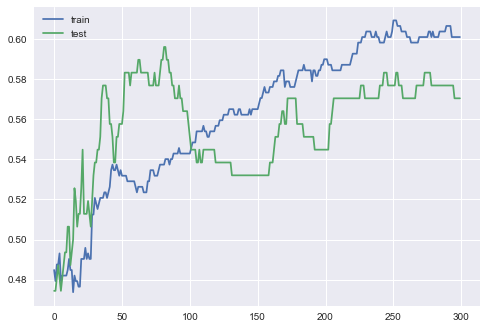

In [576]:
# plot learning curves
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

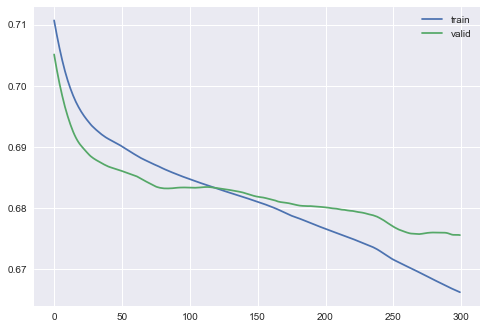

In [577]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()